# Sequential Decision Making with Stochastic Bandits

This notebook demonstrates the basics of sequential decision making using stochastic multi-armed bandits (MAB).
We implement classical algorithms like **epsilon-greedy** and **Upper Confidence Bound (UCB)**, simulate their performance, and visualize cumulative rewards and regrets.

This project aligns with faculty research on:
- Sequential decision making and stochastic modeling
- Stochastic processes and modeling
- Machine learning applications in decision-making, finance, and sustainability


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
class BernoulliBandit:
    def __init__(self, probabilities):
        """
        probabilities: list of probabilities of reward for each arm
        """
        self.probabilities = probabilities
        self.n_arms = len(probabilities)

    def pull(self, arm):
        return np.random.rand() < self.probabilities[arm]


In [3]:
def epsilon_greedy(bandit, n_steps, epsilon=0.1):
    n_arms = bandit.n_arms
    rewards = np.zeros(n_steps)
    counts = np.zeros(n_arms)
    estimates = np.zeros(n_arms)

    for t in range(n_steps):
        if np.random.rand() < epsilon:
            arm = np.random.randint(n_arms)  # Explore
        else:
            arm = np.argmax(estimates)  # Exploit

        reward = bandit.pull(arm)
        counts[arm] += 1
        estimates[arm] += (reward - estimates[arm]) / counts[arm]
        rewards[t] = reward

    return rewards, estimates, counts


In [4]:
def ucb(bandit, n_steps):
    n_arms = bandit.n_arms
    rewards = np.zeros(n_steps)
    counts = np.zeros(n_arms)
    estimates = np.zeros(n_arms)

    for t in range(n_steps):
        if t < n_arms:
            arm = t  # Play each arm once initially
        else:
            confidence_bounds = estimates + np.sqrt(2 * np.log(t) / counts)
            arm = np.argmax(confidence_bounds)

        reward = bandit.pull(arm)
        counts[arm] += 1
        estimates[arm] += (reward - estimates[arm]) / counts[arm]
        rewards[t] = reward

    return rewards, estimates, counts


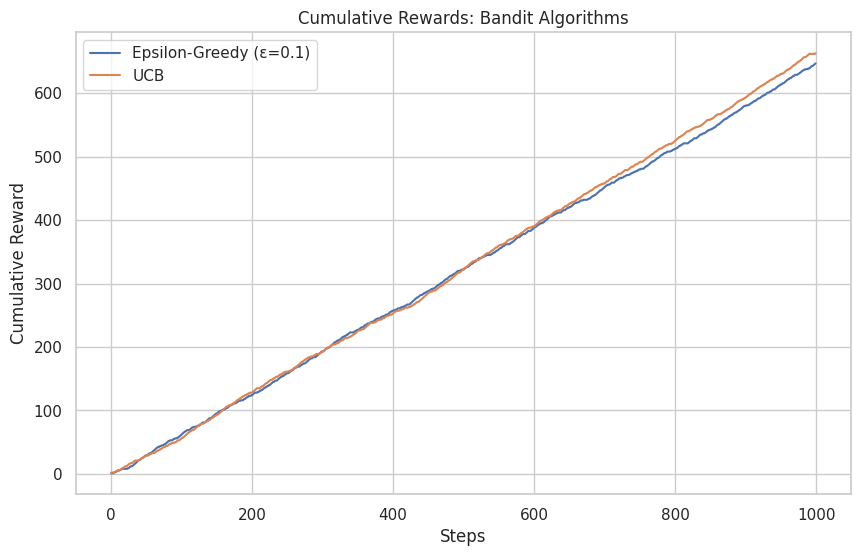

In [5]:
# Bandit setup
true_probs = [0.3, 0.5, 0.7]  # Three-armed bandit
bandit = BernoulliBandit(true_probs)
n_steps = 1000

# Run epsilon-greedy
epsilon_rewards, _, _ = epsilon_greedy(bandit, n_steps, epsilon=0.1)
# Run UCB
ucb_rewards, _, _ = ucb(bandit, n_steps)

# Cumulative rewards
cum_rewards_eps = np.cumsum(epsilon_rewards)
cum_rewards_ucb = np.cumsum(ucb_rewards)

# Plot
plt.figure(figsize=(10,6))
plt.plot(cum_rewards_eps, label='Epsilon-Greedy (ε=0.1)')
plt.plot(cum_rewards_ucb, label='UCB')
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards: Bandit Algorithms')
plt.legend()
plt.show()


## Discussion

- **Epsilon-Greedy**: Simple and effective, balances exploration/exploitation with a fixed probability ε.  
- **UCB**: Uses confidence bounds to prioritize less-explored arms, often performs better for long horizons.  
- Both algorithms converge to the optimal arm selection over time, but UCB adapts more efficiently in uncertain environments.  
- This experiment aligns with research interests in sequential decision making, stochastic modeling, and algorithmic learning under uncertainty.


## Inference

- UCB typically achieves higher cumulative reward than epsilon-greedy for this setup.  
- Both methods are fundamental building blocks for more complex reinforcement learning algorithms.  
- This framework can be extended to real-world applications like financial portfolio selection, adaptive clinical trials, and sustainable resource allocation.
